# Talktorial 4

# Ligand-based screening: compound similarity

#### Developed in the CADD seminars 2017 and 2018, AG Volkamer, Charité/FU Berlin 

Andrea Morger and Franziska Fritz

## Aim of this talktorial

In this talktorial, we get familiar with different approaches to encode (descriptors, fingerprints) and compare (similarity measures) molecules. Furthermore, we perform a virtual screening in form of a similarity search for the EGFR inhibitor Gefitinib against our dataset of EGFR-tested compounds from the ChEMBL database filtered by Lipinski's rule of five (see **talktorial 2**). 

## Learning goals

### Theory

* Molecular similarity
* Molecular descriptors
* Molecular fingerprints
  * Substructure-based fingerprints
  * MACCS fingerprints
  * Morgan fingerprints, circular fingerprints
* Molecular similarity measures
  * Tanimoto coefficient
  * Dice coefficient
* Virtual screening
  * Virtual screening using similarity search

### Practical

* Import and draw molecules
* Calculate molecular descriptors
  * 1D molecular descriptors: Molecular weight
  * 2D molecular descriptors: MACCS fingerprint
  * 2D molecular descriptors: Morgan fingerprints
* Calculate molecular similarity
  * MACCS fingerprints: Tanimoto and Dice similarity
  * Morgan fingerprints: Tanimoto and Dice similarity
* Virtual screening using similarity search
  * Compare query compound to all compounds in a data set
  * Distribution of similarity values
  * Visualize most similar molecules
  * Generate enrichment plots

## References

* Review on "Molecular similarity in medicinal chemistry" ([<i>J. Med. Chem.</i> (2014), <b>57</b>, 3186-3204](http://pubs.acs.org/doi/abs/10.1021/jm401411z))
* Morgan fingerprints with RDKit ([RDKit tutorial on Morgan fingerprints](http://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints))
* ECFP - extended-connectivity fingerprints ([<i>J. Chem. Inf. Model.</i> (2010), <b>50</b>,742-754](https://pubs.acs.org/doi/abs/10.1021/ci100050t))
* Chemical space
([<i>ACS Chem. Neurosci.</i> (2012), <b>19</b>, 649-57](https://www.ncbi.nlm.nih.gov/pubmed/23019491))
* List of molecular descriptors in RDKit ([RDKit documentation: Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors))
* List of fingerprints in RDKit ([RDKit documentation: Fingerprints](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-fingerprints))
* Enrichment plots ([Applied Chemoinformatics, Wiley-VCH Verlag GmbH & Co. KGaA, Weinheim, (2018), **1**, 313-31](https://onlinelibrary.wiley.com/doi/10.1002/9783527806539.ch6h))

_____________________________________________________________________________________________________________________


## Theory

### Molecular similarity

Molecular similarity is a well known and often used concept in chemical informatics. Comparing compounds and their properties can be used in many different ways and may help us in identifying new compounds with desired properties and biological activity.

The assumption that structurally similar molecules have similar properties and, thus, similar biological activity is represented in the similarity property principle (SPP) as well as the structure activity relationship (SAR). 
In this context, virtual screening follows the idea that given a set of molecules with known binding affinity, we can look for further such molecules.

### Molecular descriptors

Similarity can be assessed in many different ways depending on the application (see <a href="http://pubs.acs.org/doi/abs/10.1021/jm401411z"><i>J. Med. Chem.</i> (2014), <b>57</b>, 3186-3204</a>):

* **1D molecular descriptor**: Solubility, logP, molecular weight, melting point etc.
    * Global descriptor: only one value representing the whole compound <br>
    * Usually not enough characteristics specifying a molecule to apply machine learning (ML) 
    * Can be added to 2D fingerprints to improve molecular encoding for ML
* **2D molecular descriptors**: Molecular graphs, paths, fragments, atom environments
    * Detailed representation of individual parts of the molecule 
    * Many features/bits per molecule called fingerprints
    * Very often used in similarity search and ML
* **3D molecular descriptors**: Shape, stereochemistry
    * Chemists are usually trained for 2D representations <br>
    * Less robust than 2D representations because of compound flexibility (what is the "right" conformation of a compound?)
* **Biological similarity**
    * Biological fingerprint, e.g. individual bits represent bioactivity measure against different targets
    * Independent of molecular structure
    * Requires experimental (or predicted) data


We already learned how to calculate 1D physicochemical parameters, such as molecular weight and logP in **talktorial 2**. More about such descriptors in RDKit can be found in the [RDKit documentation: Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors). 

In the following, we focus on the definition of 2D (or 3D) molecular descriptors. Due to their, mostly, uniqueness per molecule, these descriptors are also called fingerprints.

### Molecular fingerprints

#### Substructure-based fingerprints

Molecular fingerprints are a computational representation of molecules that encode chemical and molecular features in form of bitstrings, bitvectors or arrays. Each bit corresponds to a predefined molecular feature or environment, where "1" represents the presence and "0" the absence of a feature. Note that some implementations are count-based, thus, they count how often a specific feature is present.

There are multiple ways to design fingerprints.
Here, we introduce MACCS keys and Morgan fingerprint as two commonly used 2D fingerprints. 
As can be seen in the [RDKit documentation: Fingerprints](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-fingerprints), RDKit also offers multiple alternate fingerprints. 

#### MACCS fingerprints

Molecular ACCess System 
(MACCS) fingerprints, also termed MACCS structural keys, consist of 166 predefined structural fragments. Each position queries the presence or absence of one particular structural fragment or key. 
The individual keys were empirically defined by medicinal chemists and are simple to use and interpret ([RDKit documentation: MACCS keys](http://rdkit.org/Python_Docs/rdkit.Chem.MACCSkeys-module.html)).

<img src="images/maccs_fp.png" align="above" alt="Image cannot be shown" width="250">
<div align="center"> Figure 2: Illustration of MACCS fingerprint (figure by Andrea Morger).</div>

#### Morgan fingerprints and circular fingerprints 

This family of fingerprints is based on the Morgan algorithm. 
The bits correspond to the circular environments of each atom in a molecule. 
The number of neighboring bonds and atoms to consider is set by the radius. 
Also the length of the bit string can be defined, a longer bit string will be modded to the desired length. 
Therefore, the Morgan fingerprint is not limited to a certain number of bits. 
More about the Morgan fingerprint can be found in the 
[RDKit documentation: Morgan fingerprints](http://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints). 
Extended connectivity fingerprints (ECFP) are also commonly used fingerprints that are derived using a variant of the Morgan algorithm, see ([<i>J. Chem. Inf. Model.</i> (2010), <b>50</b>,742-754](https://pubs.acs.org/doi/abs/10.1021/ci100050t)) for further information. 

<img src="images/morgan_fp.png" align="above" alt="Image cannot be shown" width="270">
<div align="center">Figure 3: Illustration of Morgan circular fingerprint (figure by Andrea Morger).</div>

### Molecular similarity measures 

Once the descriptors/fingerprints are calculated, they can be compared to assess the similarity between two molecules. Molecular similarity can be quantified with a number of different similarity coefficients, two common similarity measures are the Tanimoto and Dice index ([<i>J. Med. Chem.</i> (2014), <b>57</b>, 3186-3204](http://pubs.acs.org/doi/abs/10.1021/jm401411z)).

#### Tanimoto coefficient

$$T _{c}(A,B) = \frac{c}{a+b-c}$$

a: number of features present in compound A <br>
b: number of features present in compound B <br>
c: number of features shared by compounds A and B

#### Dice coefficient

$$D_{c}(A,B) = \frac{c}{\frac{1}{2}(a+b)}$$

a: number of features present in compound A <br>
b: number of features present in compound B <br>
c: number of features shared by compounds A and B

The similarity measures usually consider the number of positive bits (1's) present in either fingerprint and the number of positive bits that both have in common. 
Dice similarity usually returns higher values than Tanimoto similarity because of their denominators:

$$\frac{c}{a+b-c} \leq \frac{c}{\frac{1}{2}(a+b)}$$


### Virtual screening 

The challenge in early stages of drug discovery is to narrow down a set of small molecules (compounds) from the large existing chemical space that are potentially binding to the target under investigation. Note that this chemical space is vast: Small molecules can be made of 10<sup>20</sup> combinations of chemical moieties ([<i>ACS Chem. Neurosci.</i> (2012), <b>19</b>, 649-57](https://www.ncbi.nlm.nih.gov/pubmed/23019491)). 

Since experimental high-throughput screening (HTS) for the activity of all those small molecules against the target of interest is cost and time intensive, computer-aided methods are invoked to propose a focused list of small molecules to be tested. This process is called virtual (high-throughput) screening: a large library of small molecules is filtered by rules and/or patterns, in order to identify those small molecules that are most likely to bind a target under investigation.

#### Virtual screening using similarity search

Comparing a set of novel molecules against a (or several) known active molecule(s) to find the most similar ones can be used as a simple way of virtual screening. 
Given the similar property principle, we can assume that the most similar molecules, e.g. to a known inhibitor, also have similar effects. Requirements for a similarity search are the following (as discussed in detail above):

* A representation that encodes chemical/molecular features
* A potential weighting of features (optional)
* A similarity measurement

A similarity search can be performed by calculating the similarity between one compound and all compounds in a specific database. Ranking the compounds of the database by their similarity coefficient yields the most similar molecules at the top.

#### Enrichment plots

Enrichment plots are used to validate virtual screening results, which display the ratio of active compounds detected in the top x% of the ranked list, i.e.: 
* the ratio of top-ranked molecules (x-axis) from the whole dataset vs. 
* the ratio of active molecules (y-axis) from the whole dataset.

<img src="images/enrichment_plot.png" align="above" alt="Image cannot be shown" width="270">
<div align="center">Figure 4: Example of enrichment plot for virtual screening results.</div>

## Practical

In the first part of this practical section, we will use RDKit to encode molecules (molecular fingerprints) and compare them in order to calculate their similarity (molecular similarity measures), as discussed in the theory section above.

In the second part, we will use these encoding and comparison techniques to conduct a similarity search (virtual screening): 
We use the known EGFR inhibitor Gefitinib as query and search for similar compounds in our data set of compounds tested on EGFR, which we collected from the ChEMBL database in **talktorial 1** and filtered by Lipinski's rule of five in **talktorial 2**.

### Import and draw molecules

First, we define and draw eight example molecules, which we will encode and compare later on. 
The molecules in SMILES format are converted to RDKit molecule objects and visualized with the RDKit `Draw` function.

In [22]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import (
    PandasTools,
    Draw,
    Descriptors,
    MACCSkeys,
    rdFingerprintGenerator,
)

In [8]:
# Set path to this notebook
DATA ="/Users/viqor/Desktop/bilimmentorlugu_papers/"
#HGFSF_3717_cMet_IC50_top10.xlsx

In [13]:
# Read data from previous talktorials
chembl_df = pd.read_excel("/Users/viqor/Desktop/bilimmentorlugu_papers/HGFSF_3717_cMet_IC50_top10.xlsx")

# Look at head
print("Shape of dataframe : ", chembl_df.shape)
chembl_df.head()
# NBVAL_CHECK_OUTPUT

Shape of dataframe :  (10, 45)


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3188267,CAPMATINIB,4,412.43,0,1943-03-01 00:00:00,INCB28060,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F,IC50,'=',...,Hepatocyte growth factor receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3763130,1,Scientific Literature,Eur. J. Med. Chem.,2016,None,NaN
1,CHEMBL3582305,NaN,0,413.42,0,1982-02-01 00:00:00,"6, INC-280",CNC(=O)c1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1F,IC50,'=',...,Hepatocyte growth factor receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3580555,1,Scientific Literature,ACS Med. Chem. Lett.,2015,None,NaN
2,CHEMBL3797911,NaN,0,384.40,0,1932-03-01 00:00:00,2,COc1ccc2c(OCc3nnc4ncc(-c5ccccc5)nn34)ccnc2c1,IC50,'=',...,Hepatocyte growth factor receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3797175,1,Scientific Literature,Eur. J. Med. Chem.,2016,None,NaN
3,CHEMBL1802904,NaN,0,506.63,1,1949-03-01 00:00:00,68,CCN1CCC(n2cc(-c3cnc4ccc5ccc(NS(=O)(=O)N(C)C)cc...,IC50,'=',...,Hepatocyte growth factor receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1800066,1,Scientific Literature,J. Med. Chem.,2011,None,NaN
4,CHEMBL2032280,NaN,0,504.47,0,2027-03-01 00:00:00,6h,Cc1c(O)ccc2nc(-c3cc(-c4cnn(C5CCNCC5)c4)cnc3N)o...,IC50,'=',...,Hepatocyte growth factor receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL2029247,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2012,None,NaN


In [15]:
# Keep only the columns we want
chembl_df = chembl_df[["Molecule ChEMBL ID", "Smiles"]]
chembl_df.head()
# NBVAL_CHECK_OUTPUT

,Molecule ChEMBL ID,Smiles
0,CHEMBL3188267,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F
1,CHEMBL3582305,CNC(=O)c1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1F
2,CHEMBL3797911,COc1ccc2c(OCc3nnc4ncc(-c5ccccc5)nn34)ccnc2c1
3,CHEMBL1802904,CCN1CCC(n2cc(-c3cnc4ccc5ccc(NS(=O)(=O)N(C)C)cc...
4,CHEMBL2032280,Cc1c(O)ccc2nc(-c3cc(-c4cnn(C5CCNCC5)c4)cnc3N)o...


In [29]:
chembl_df["Smiles"].to_list()

['CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F',
 'CNC(=O)c1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1F',
 'COc1ccc2c(OCc3nnc4ncc(-c5ccccc5)nn34)ccnc2c1',
 'CCN1CCC(n2cc(-c3cnc4ccc5ccc(NS(=O)(=O)N(C)C)cc5c(=O)c4c3)cn2)CC1',
 'Cc1c(O)ccc2nc(-c3cc(-c4cnn(C5CCNCC5)c4)cnc3N)oc12.O=C(O)C(F)(F)F',
 'C/C(=N\\NC(N)=O)c1ccc2nnc([C@@H](C)c3ccc4ncccc4c3)n2n1',
 'N=C(NNC(N)=O)c1cnc2nnn(Cc3ccc4ncccc4c3)c2n1',
 'C/C(=N\\NC(N)=O)c1cnc2nnn(Cc3cc4cccnc4cc3F)c2n1',
 'Fc1ccc(-c2cnc3nnc(C(F)(F)c4ccc5ncccc5c4)n3n2)cc1',
 'NC(=O)N/N=C/c1cnc2nnn(Cc3ccc4ncccc4c3)c2n1']

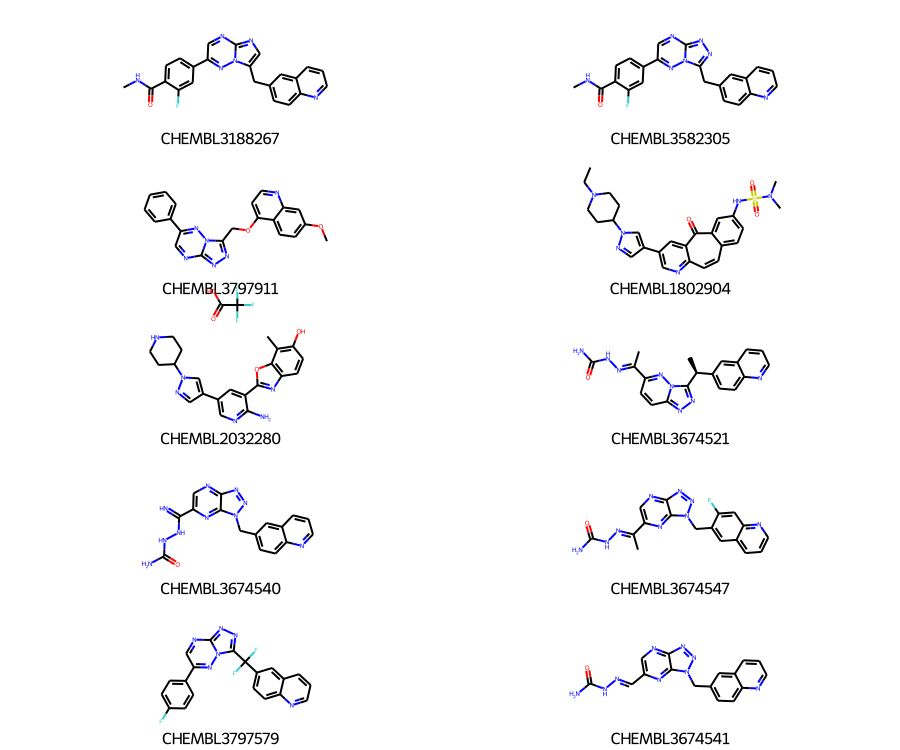

In [34]:
# Construct list of molecule SMILES
smiles = chembl_df["Smiles"].to_list()
                    

# Construct list of ROMol objects
mols = [Chem.MolFromSmiles(i) for i in smiles]

# Construct list of molecule names
mol_names = chembl_df["Molecule ChEMBL ID"].to_list()

# Draw molecules
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(450,150), legends= mol_names)

### Calculate molecular descriptors

We extract and generate 1D and 2D molecular descriptors to compare our molecules. 
For 2D descriptors, different types of fingerprints are generated to be used later for the calculation of the molecular similarity.

#### 1D molecular descriptors: molecular weight

We calculate the molecular weight of our example structures.

In [35]:
# Calculate molecular weight of molecules
mol_weights = [Descriptors.MolWt(mol) for mol in mols]

We draw our molecular structures with their similar molecular weight for visual comparison: is the molecular weight a feasible descriptor for compound similarity?

In [36]:
# Generate DataFrame for the results
sim_mw_df = pd.DataFrame({'smiles': smiles, 'name': mol_names, 'mw': mol_weights, "Mol": mols})

# Sort by molecular weight
sim_mw_df.sort_values(['mw'], ascending=False, inplace=True)
sim_mw_df[["smiles", "name", "mw"]]

,smiles,name,mw
3,CCN1CCC(n2cc(-c3cnc4ccc5ccc(NS(=O)(=O)N(C)C)cc...,CHEMBL1802904,506.632
4,Cc1c(O)ccc2nc(-c3cc(-c4cnn(C5CCNCC5)c4)cnc3N)o...,CHEMBL2032280,504.469
1,CNC(=O)c1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1F,CHEMBL3582305,413.416
0,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F,CHEMBL3188267,412.428
8,Fc1ccc(-c2cnc3nnc(C(F)(F)c4ccc5ncccc5c4)n3n2)cc1,CHEMBL3797579,392.344
2,COc1ccc2c(OCc3nnc4ncc(-c5ccccc5)nn34)ccnc2c1,CHEMBL3797911,384.399
7,C/C(=N\NC(N)=O)c1cnc2nnn(Cc3cc4cccnc4cc3F)c2n1,CHEMBL3674547,379.359
5,C/C(=N\NC(N)=O)c1ccc2nnc([C@@H](C)c3ccc4ncccc4...,CHEMBL3674521,374.408
6,N=C(NNC(N)=O)c1cnc2nnn(Cc3ccc4ncccc4c3)c2n1,CHEMBL3674540,362.357
9,NC(=O)N/N=C/c1cnc2nnn(Cc3ccc4ncccc4c3)c2n1,CHEMBL3674541,347.342


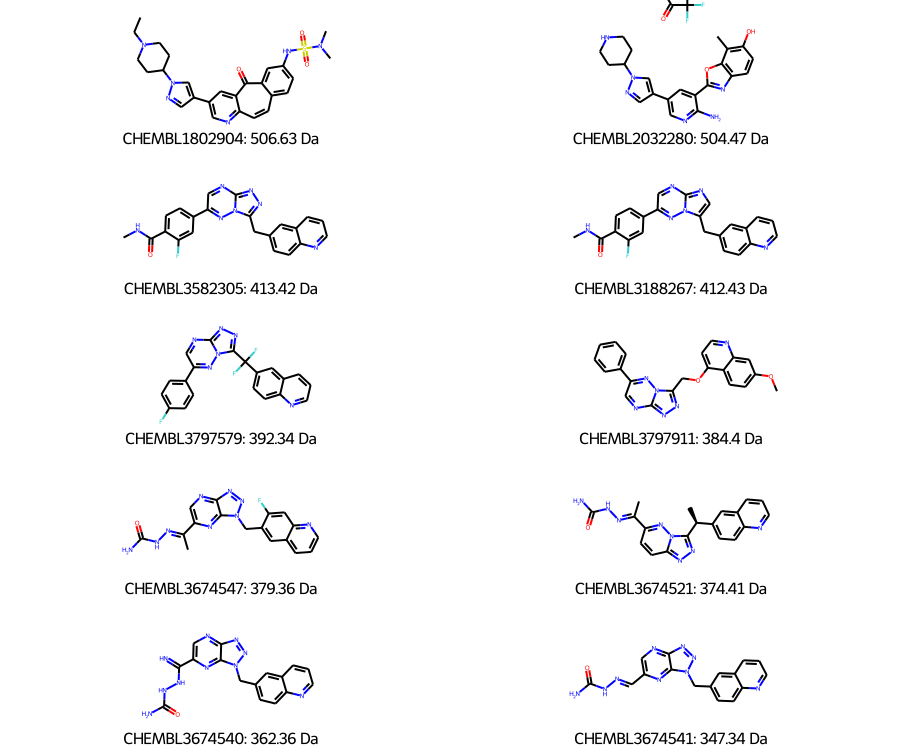

In [37]:
# Draw the molecules with their molecular weight
Draw.MolsToGridImage(sim_mw_df["Mol"], 
                     legends=[i+': '+str(round(j, 2))+" Da" for i,j in zip(sim_mw_df["name"], sim_mw_df["mw"])],
                     molsPerRow=2, subImgSize=(450, 150))

As we can see, molecules with similar molecular weight can have a similar structure (e.g. Doxycycline/Tetracycline), however they can also have a similar number of atoms in completely different arrangements (e.g. Doxycycline/Glycol dilaurate or Hydrochlorothiazide/Isotretinoine).

In order to account for more detailed properties of a molecule, we now take a look at 2D molecular descriptors.

#### 2D molecular descriptors: MACCS fingerprint

MACCS fingerprints can be easily generated using RDKit. As explicit bitvectors are not human-readable, we will further transform them to bitstrings.

In [38]:
# Generate MACCS fingerprint 
maccs_fp1 = MACCSkeys.GenMACCSKeys(mols[0])  # CAPMATINIB
maccs_fp2 = MACCSkeys.GenMACCSKeys(mols[1])
maccs_fp1

In [39]:
# Print fingerprint as bitstring
maccs_fp1.ToBitString()

'00000000000000000000000001000000000000000010000000001000000000100100000000000101100100010000111010100100011100110000010011101100000000100100001011001011001110101111110'

In [40]:
# Generate MACCS fingerprints for all molecules
maccs_fp_list = []
for i in range(len(mols)):
    maccs_fp_list.append(MACCSkeys.GenMACCSKeys(mols[i]))

#### 2D molecular descriptors: Morgan fingerprints

We also calculate the circular Morgan fingerprints with RDKit. 
With two different functions, the Morgan fingerprint can be calculated either as int or bit vector.

In [41]:
# Generate Morgan fingerprint (as int vector), by default the radius is 2 and the vector is 2048 long
circ_fp1 = rdFingerprintGenerator.GetCountFPs(mols[:1])[0]
circ_fp1

In [42]:
# Look at the values that are set:
circ_fp1.GetNonzeroElements()

{67: 1,
 80: 1,
 310: 1,
 345: 1,
 378: 4,
 412: 1,
 430: 1,
 448: 1,
 486: 1,
 650: 1,
 699: 1,
 710: 1,
 773: 1,
 806: 1,
 807: 1,
 813: 1,
 845: 1,
 875: 2,
 878: 1,
 896: 1,
 922: 1,
 930: 1,
 935: 1,
 944: 1,
 961: 1,
 980: 1,
 1043: 1,
 1057: 1,
 1087: 1,
 1088: 1,
 1096: 1,
 1097: 1,
 1123: 1,
 1139: 1,
 1152: 1,
 1160: 1,
 1380: 9,
 1387: 1,
 1430: 2,
 1446: 2,
 1452: 3,
 1535: 2,
 1552: 1,
 1637: 1,
 1649: 1,
 1660: 1,
 1750: 5,
 1754: 1,
 1762: 1,
 1840: 1,
 1855: 1,
 1866: 1,
 1873: 11,
 1875: 1,
 1917: 1,
 1928: 1,
 1929: 1,
 1956: 1,
 1991: 1}

In [43]:
# Generate Morgan fingerprint (as bit vector), by default the radius is 2 and the fingerprint is 2048 long
circ_b_fp1 = rdFingerprintGenerator.GetFPs(mols[:1])[0]
circ_b_fp1

In [44]:
# Print fingerprint as bitstring
circ_b_fp1.ToBitString()

'000000000000000000000000000000000000000000000000000000000000000000010000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000100000000000000000000000000000000100000000000000000000000000000000010000000000000000010000000000000000010000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000100000000001000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000001100000100000000000000000000000000000001000000000000000000000000000001001000000000000000001000000000000000000000000010000000100001000000001000000000000000010000000000000000001000000000000000000

In [45]:
# Generate Morgan fingerprint for all molecules
circ_fp_list = rdFingerprintGenerator.GetFPs(mols)

### Calculate molecular similarity

In the following, we will apply two similarity measures, i.e. **Tanimoto** and **Dice**, to our two fingerprint types, i.e. **MACCS** and **Morgan** fingerprints.

Example: Two MACCS fingerprints compared with the Tanimoto similarity.

In [46]:
# Calculate Tanimoto coefficients between two molecules
DataStructs.TanimotoSimilarity(maccs_fp1, maccs_fp2)

0.9574468085106383

In [47]:
# Calculate Tanimoto coefficient between the same molecule
DataStructs.TanimotoSimilarity(maccs_fp1, maccs_fp1)

1.0

In the following, we want to compare a query compound with our molecule list. 
Therefore, we use the RDKit functions ```BulkTanimotoSimilarity``` and ```BulkDiceSimilarity``` that calculate the similarity of a query fingerprint with a list of fingerprints, based on a similarity measure, i.e. either the Tanimoto or Dice similarity. 

After calculating the similarity, we want to draw our ranked molecules with the following function:

In [48]:
def draw_ranked_molecules(sim_df_sorted, sorted_column):
    """
    Function that draws molecules from a (sorted) DataFrame.
    """
    # Define labels: first molecule is query, following molecules start from rank 1
    rank = ["#"+str(i)+": " for i in range(0, len(sim_df_sorted))]
    rank[0] = "Query: "

    # Draw most similar molecules to Doxycycline (Tanimoto and MACCS fingerprint)
    top_smiles = sim_df_sorted["smiles"].tolist()
    top_mols = [Chem.MolFromSmiles(i) for i in top_smiles]
    top_names = [i+j+" ("+str(round(k, 2))+")" for i, j, k in zip(rank, sim_df_sorted["name"].tolist(), 
                                                                  sim_df_sorted[sorted_column])]

    return Draw.MolsToGridImage(top_mols, legends=top_names, molsPerRow=2, subImgSize=(450, 150))

In the following, we will investigate all combinations of MACCS/Morgan fingerprint comparisons based on the Tanimoto/Dice similarity measure. Therefore, we create a DataFrame that will summarize our results:

In [49]:
# Generate DataFrame for the results
sim_df = pd.DataFrame({'smiles': smiles, 'name': mol_names})

#### MACCS fingerprints: Tanimoto similarity

In [50]:
# Add similarity scores to DataFrame
sim_df['tanimoto_MACCS'] = DataStructs.BulkTanimotoSimilarity(maccs_fp1,maccs_fp_list)

In [51]:
# DataFrame sorted by Tanimoto similarity of MACCS fingerprints
sim_df_sorted_t_ma = sim_df.copy()
sim_df_sorted_t_ma.sort_values(['tanimoto_MACCS'], ascending=False, inplace=True)
sim_df_sorted_t_ma

,smiles,name,tanimoto_MACCS
0,CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F,CHEMBL3188267,1.000000
1,CNC(=O)c1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1F,CHEMBL3582305,0.957447
7,C/C(=N\NC(N)=O)c1cnc2nnn(Cc3cc4cccnc4cc3F)c2n1,CHEMBL3674547,0.694915
8,Fc1ccc(-c2cnc3nnc(C(F)(F)c4ccc5ncccc5c4)n3n2)cc1,CHEMBL3797579,0.666667
5,C/C(=N\NC(N)=O)c1ccc2nnc([C@@H](C)c3ccc4ncccc4...,CHEMBL3674521,0.589286
9,NC(=O)N/N=C/c1cnc2nnn(Cc3ccc4ncccc4c3)c2n1,CHEMBL3674541,0.576271
2,COc1ccc2c(OCc3nnc4ncc(-c5ccccc5)nn34)ccnc2c1,CHEMBL3797911,0.568966
6,N=C(NNC(N)=O)c1cnc2nnn(Cc3ccc4ncccc4c3)c2n1,CHEMBL3674540,0.557377
4,Cc1c(O)ccc2nc(-c3cc(-c4cnn(C5CCNCC5)c4)cnc3N)o...,CHEMBL2032280,0.512821
3,CCN1CCC(n2cc(-c3cnc4ccc5ccc(NS(=O)(=O)N(C)C)cc...,CHEMBL1802904,0.411765


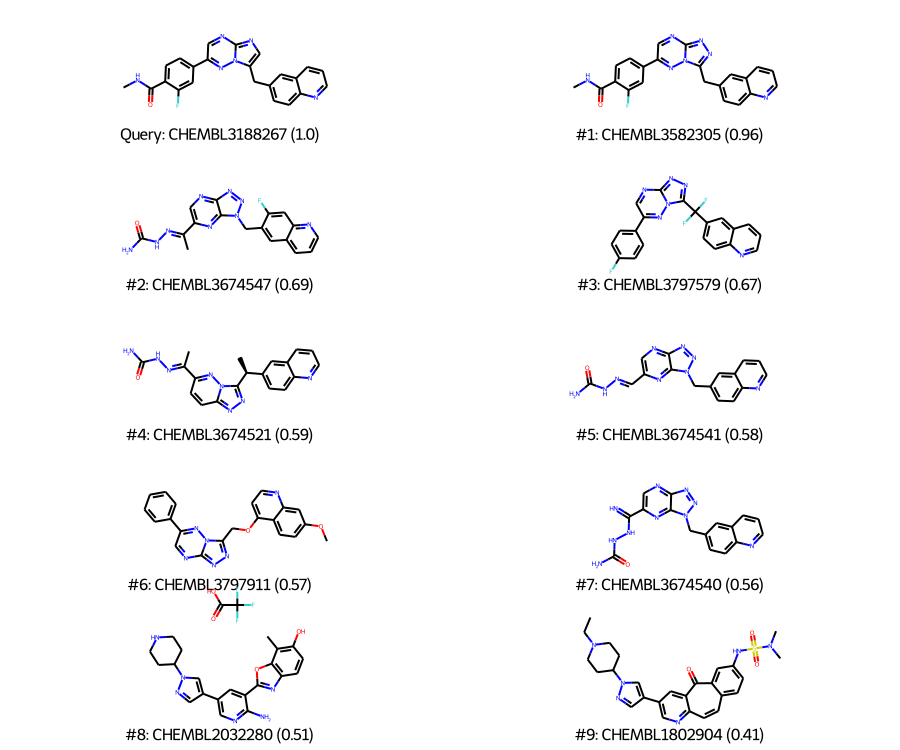

In [52]:
# Draw molecules ranked by Tanimoto similarity of MACCS fingerprints
draw_ranked_molecules(sim_df_sorted_t_ma, "tanimoto_MACCS")

With MACCS fingerprints, Tetracycline is the most similar molecule (high score), followed by Amoxicilline. In contrast to the 1D descriptor molecular weight, the linear molecule Glycol dilaurate is recognized as dissimilar (last rank).

#### MACCS fingerprints: Dice similarity

In [53]:
# Add similarity scores to DataFrame
sim_df['dice_MACCS'] = DataStructs.BulkDiceSimilarity(maccs_fp1, maccs_fp_list)

In [22]:
# DataFrame sorted by Dice similarity of MACCS fingerprints
sim_df_sorted_d_ma = sim_df.copy()
sim_df_sorted_d_ma.sort_values(['dice_MACCS'], ascending=False, inplace=True)
sim_df_sorted_d_ma

,smiles,name,tanimoto_MACCS,dice_MACCS
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,1.000000,1.000000
6,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Tetracycline,0.928571,0.962963
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicilline,0.590909,0.742857
7,CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O,Hemi-cycline D,0.403509,0.575000
2,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,Furosemide,0.321839,0.486957
4,C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl,Hydrochlorothiazide,0.306818,0.469565
5,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C,Isotretinoine,0.288136,0.447368
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol dilaurate,0.149254,0.259740


Tanimoto and Dice similarity measures by definition result in the same ranking of molecules, with higher values for the Dice similarity (see Tanimoto and Dice equations in the theory section of this talktorial).

#### Morgan fingerprints: Tanimoto similarity

In [23]:
# Add similarity scores to DataFrame
sim_df['tanimoto_morgan'] = DataStructs.BulkTanimotoSimilarity(circ_b_fp1, circ_fp_list)
sim_df['dice_morgan'] = DataStructs.BulkDiceSimilarity(circ_b_fp1, circ_fp_list)

In [24]:
# DataFrame sorted by Tanimoto similarity of Morgan fingerprints
sim_df_sorted_t_mo = sim_df.copy()
sim_df_sorted_t_mo.sort_values(['tanimoto_morgan'], ascending=False, inplace=True)
sim_df_sorted_t_mo

,smiles,name,tanimoto_MACCS,dice_MACCS,tanimoto_morgan,dice_morgan
0,CC1C2C(C3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Doxycycline,1.000000,1.000000,1.000000,1.000000
6,CC1(C2CC3C(C(=O)C(=C(C3(C(=O)C2=C(C4=C1C=CC=C4...,Tetracycline,0.928571,0.962963,0.534247,0.696429
7,CC1C(CC(=O)C2=C1C=CC=C2O)C(=O)O,Hemi-cycline D,0.403509,0.575000,0.308824,0.471910
1,CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C...,Amoxicilline,0.590909,0.742857,0.144444,0.252427
2,C1=COC(=C1)CNC2=CC(=C(C=C2C(=O)O)S(=O)(=O)N)Cl,Furosemide,0.321839,0.486957,0.098901,0.180000
5,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC(=O)O)C)C,Isotretinoine,0.288136,0.447368,0.067416,0.126316
4,C1NC2=CC(=C(C=C2S(=O)(=O)N1)S(=O)(=O)N)Cl,Hydrochlorothiazide,0.306818,0.469565,0.058824,0.111111
3,CCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCC,Glycol dilaurate,0.149254,0.259740,0.054795,0.103896


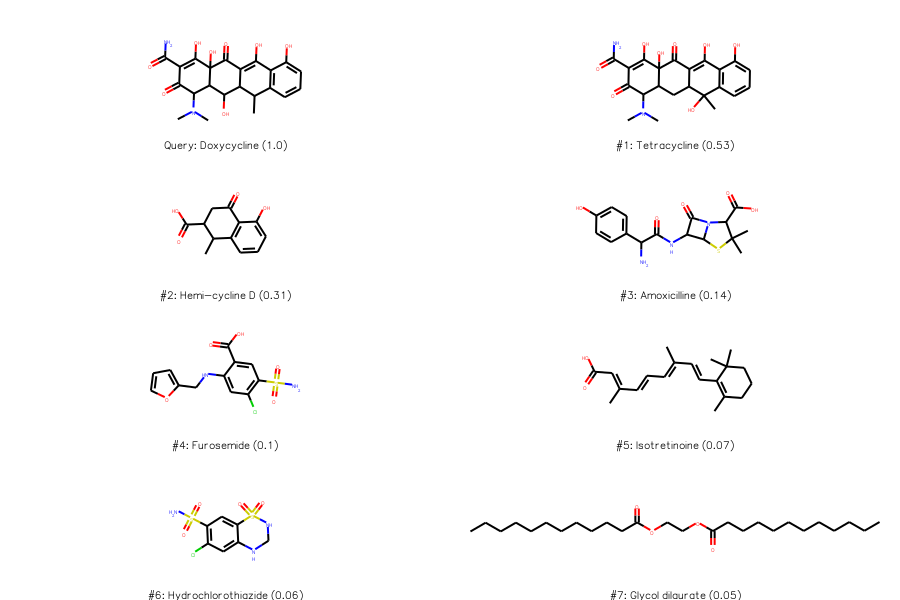

In [25]:
# Draw molecules ranked by Tanimoto similarity of Morgan fingerprints
draw_ranked_molecules(sim_df_sorted_t_mo, "tanimoto_morgan")

Compare the MACCS and Morgan similarities by plotting Tanimoto(Morgan) vs Tanimoto(MACCS)

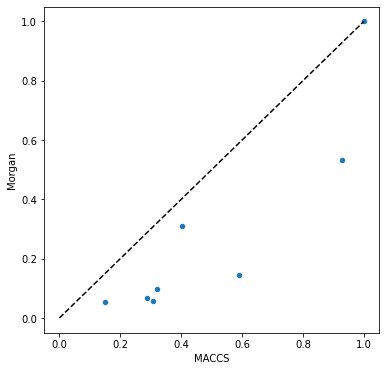

In [26]:
fig, axes = plt.subplots(figsize=(6,6), nrows=1, ncols=1)
sim_df_sorted_t_mo.plot('tanimoto_MACCS','tanimoto_morgan',kind='scatter',ax=axes)
plt.plot([0,1],[0,1],'k--')
axes.set_xlabel("MACCS")
axes.set_ylabel("Morgan")
plt.show()

Usage of different fingerprints (here: MACCS and Morgan fingerprints) results in different similarity values (here: Tanimoto similarity) and thus potentially also in different rankings of molecule similarity as shown here. 

Morgan fingerprints also recognize Tetracycline as the most similar compound to Doxycycline (but with lower score), and Clycol dilaurate as most dissimilar. However, ranked second is Hemi-cycline D, a structural part of cyclines - possibly because of the atom environment-based algorithm of Morgan fingerprints (whereas MACCS fingerprints rather ask for the occurrence of certain properties). 

### Virtual screening using similarity search

Now that we have learned how to calculate fingerprints and the similarity between them, we can apply this knowledge to a similarity search of a query compound against a full data set of compounds. 

We use the known EGFR inhibitor Gefitinib as query and search for similar compounds in our data set of compounds tested on EGFR, which we collected from the ChEMBL database in **talktorial 1** and filtered by Lipinski's rule of five in **talktorial 2**.

#### Compare query compound to all compounds in the data set

We import compounds from a *csv* file containing the filtered EGFR-tested compounds from the ChEMBL database as provided by **talktorial 2**. Given one query compound (here Gefitinib) we screen that data set for similar compounds.

# KOD BurdanBaslıyor

In [8]:
# Import data from csv file containing compounds in SMILES format
#filtered_df = pd.read_csv("/Users/viqor/Desktop/CADD/DATA/Specs_SMILES.csv", usecols=['SpecsID', 'smiles'])
#filtered_df.head() 

NameError: name 'pd' is not defined

In [14]:
# Import relevant Python packages
# The majority of the basic molecular functionality is found in module rdkit.Chem
from rdkit import Chem
# Drawing related
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs

import math
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt

In [83]:
""""
#CAMBRIDGE MOLECULE LIBRARY
from rdkit.Chem import PandasTools

fn = '/Users/viqor/Desktop/SC_Collection_Mar_2022.sdf'

df = PandasTools.LoadSDF(fn, embedProps=True, molColName=None, smilesName='smiles')
df.smiles.to_csv("/Users/viqor/Desktop/CAMBRIDGE_smiles.csv")
""""

In [109]:
count = 0
count_mols = 0
molecule_dataset = pd.read_csv("/Users/viqor/Desktop/CAMBRIDGE_smiles.csv",index_col=0,) #BENDEKI SPECS DOSYASI BU SEKILDE OKUNUYOR

C:\Users\viqor\anaconda3\envs\teachopencadd\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [110]:
filtered_df = molecule_dataset

similarity yapılacak molekulun querysi

In [108]:
filtered_df

,SpecsID,smiles
0,AA-173/40757587,CSC1=C(c2ccc(C)s2)/C(=N/C(C)(C)C)C1
1,AA-173/40757588,CSC1=C(c2ccccc2)/C(=N/C(C)(C)C)C1
2,AA-173/40757591,C/N=C1\CC(SC)=C1c1ccc(OC)cc1
3,AA-173/40757598,C/N=C1\CC(SC)=C1c1ccc(C)cc1
4,AA-173/40757599,CSC1=C(c2ccc(C)cc2)/C(=N/C(C)(C)C)C1
...,...,...
208995,CS-010/03931014,CCOc1ccc(SCC#N)cc1
208996,CS-010/03931025,COc1ccc(OCC(=O)N2CCN(Cc3ccccc3)CC2)cc1
208997,CS-010/03931035,COc1cc2c(cc1OC)C(N1CCN(C)CC1)Cc1ccccc1S2
208998,TL-004/43442054,NC(=O)C(c1ccccc1)N1CCOCC1


QUERY LIST

In [81]:
molelist = pd.read_excel("/Users/viqor/Desktop/bilimmentorlugu_papers/molecules_(chembl)_for_canvas/Molecules.xlsx")
smiles_list = molelist.Smiles
#queries = querylist.smiles.to_list()

In [82]:
molelist.Molecule_ChEMBL_ID

0      CHEMBL461648
1      CHEMBL453737
2      CHEMBL447602
3      CHEMBL444560
4     CHEMBL1236107
5      CHEMBL601719
6     CHEMBL3703197
7      CHEMBL450786
8     CHEMBL3188267
9     CHEMBL3703196
10    CHEMBL4551712
11    CHEMBL1230609
12    CHEMBL4461070
13    CHEMBL3402762
14    CHEMBL2337901
15    CHEMBL3188267
16    CHEMBL3582305
17    CHEMBL3797911
18    CHEMBL1802904
19    CHEMBL2032280
20    CHEMBL3674521
21    CHEMBL3674540
22    CHEMBL3674547
23    CHEMBL3797579
24    CHEMBL3674541
25    CHEMBL4061378
26    CHEMBL3674515
27    CHEMBL4104884
Name: Molecule_ChEMBL_ID, dtype: object

In [73]:
print(smiles_list)

0     COc1cc2nccc(Oc3ccc(-c4cnc(Cc5ccccc5)n(C)c4=O)c...
1     COc1cc2c(Oc3ccc(-c4cnc(Nc5ccc(F)cc5)n(C)c4=O)c...
2     COc1cc2c(Oc3ccc(-c4cnc(Nc5ccc(F)cc5)n(C)c4=O)n...
3     COc1cc2c(Oc3ccc(-c4cnc(Cc5ccc(F)cc5)n(C)c4=O)c...
4             Cn1cc(-c2ccc3nnc(Sc4ccc5ncccc5c4)n3n2)cn1
5     C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)...
6     Cc1c(C(=O)Nc2ccc(Oc3ccnc(NC(=O)C4CC4)c3)cc2)c(...
7     Cc1[nH]c(/C=C2\C(=O)Nc3ccc(S(=O)(=O)Cc4c(Cl)cc...
8     CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F
9     Cc1c(C(=O)Nc2ccc(Oc3ccnc(NC(=O)C4CC4)c3)c(F)c2...
10    O=C(NCCN1CCOCC1)Nc1nc2ccc(Sc3nnc4ccc(OC5CCCCC5...
11    COc1cc2c(Oc3ccc(NC(=O)C4(C(=O)Nc5ccc(F)cc5)CC4...
12    O=C(NCCN1CCOCC1)Nc1nc2ccc(Sc3nnc4ccc(-c5ccc(F)...
13    CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)cc...
14    Nc1c(S(=O)(=O)[O-])cc(Nc2ccc(-c3ccc(Nc4cc(S(=O...
15    CNC(=O)c1ccc(-c2cnc3ncc(Cc4ccc5ncccc5c4)n3n2)cc1F
16    CNC(=O)c1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1F
17         COc1ccc2c(OCc3nnc4ncc(-c5ccccc5)nn34)

In [74]:
# Generate Mol object from SMILES of query compound
queries=[]
for i in smiles_list:
    query = Chem.MolFromSmiles(i);  
    queries.append(query)


In [78]:
# Generate MACCS and Morgan fingerprints for query compound
maccs_fp_queries = []
circ_fp_queries= []
for query in queries:
    maccs_fp_query = MACCSkeys.GenMACCSKeys(query)
    circ_fp_query = rdFingerprintGenerator.GetCountFPs([query])[0]
    maccs_fp_queries.append(maccs_fp_query)
    circ_fp_queries.append(circ_fp_query)

# specs molecules için fingerprintleri yükle

In [ ]:
# Generate MACCS and Morgan fingerprints for all molecules in file (CAMBRIDGE)
ms = [Chem.MolFromSmiles(i) for i in filtered_df.smiles]
circ_fp_list = rdFingerprintGenerator.GetCountFPs(ms)

In [ ]:
from numpy import asarray
from numpy import savez_compressed

# save to npy file
savez_compressed("/Users/viqor/Desktop/CAMBRIDGE_circ_fp_list.npz", circ_fp_list)


In [ ]:
"""""
# load numpy array from npz file
from numpy import load
# load dict of arrays
Xdict_data = load("/Users/viqor/Desktop/CAMBRIDGE_circ_fp_list.npz")
# extract the first array
circ_fp_list = Xdict_data['arr_0']

print("circ_fp_list shape: " , circ_fp_list.shape)
"""""

In [112]:
# Make table with ChEMLB ID, SMILES and Tanimoto similarity of the compounds to Gefitinib
similarity_df = pd.DataFrame({#'ChEMBL_ID':filtered_df.SpecsID,
                              #'tanimoto_MACCS': tanimoto_maccs, 
                              #'tanimoto_morgan': tanimoto_circ, 
                              #'dice_MACCS': dice_maccs,
                              #'dice_morgan': dice_circ,
                              'smiles': filtered_df.smiles,})

In [113]:
similarity_df

,smiles
0,O=C(O)COc1ccc2c(c1)CCC2
1,O=C(O)COc1ccc(F)cc1Cl
2,O=C(O)COc1ccccc1Br
3,CC(Oc1ccc(F)cc1F)C(=O)O
4,Cc1ccccc1OC(C)C(=O)O
...,...
1569612,CC[C@H]1CN(C(=O)CN2C(=O)COc3ccc(C)cc32)CC[C@@]...
1569613,CNC(=O)[C@@H]1C[C@H](N)CN1C(=O)CN1C(=O)COc2ccc...
1569614,COc1cccc2c1OCCCN(C(=O)CN1C(=O)CCc3ccccc31)C2
1569615,O=C(CN1C(=O)CCc2ccccc21)N1CCC(C(=O)N2CCOCC2)CC1


In [129]:

 
# Define a dictionary containing Students data
data = {'Name': ['Jai', 'Princi', 'Gaurav', 'Anuj'],
        'Height': [5.1, 6.2, 5.1, 5.2],
        'Qualification': ['Msc', 'MA', 'Msc', 'Msc']}
 
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
 
# Declare a list that is to be converted into a column
address = ['Delhi', 'Bangalore', 'Chennai', 'Patna']
 
# Using 'Address' as the column name
# and equating it to the list
for i in range(len(molelist.Molecule_ChEMBL_ID)):
    df['Tanimoto_' + str(molelist.Molecule_ChEMBL_ID[i])] = address

In [130]:
df

,Name,Height,Qualification,Tanimoto_CHEMBL461648,Tanimoto_CHEMBL453737,Tanimoto_CHEMBL447602,Tanimoto_CHEMBL444560,Tanimoto_CHEMBL1236107,Tanimoto_CHEMBL601719,Tanimoto_CHEMBL3703197,...,Tanimoto_CHEMBL1802904,Tanimoto_CHEMBL2032280,Tanimoto_CHEMBL3674521,Tanimoto_CHEMBL3674540,Tanimoto_CHEMBL3674547,Tanimoto_CHEMBL3797579,Tanimoto_CHEMBL3674541,Tanimoto_CHEMBL4061378,Tanimoto_CHEMBL3674515,Tanimoto_CHEMBL4104884
0,Jai,5.1,Msc,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi,...,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi,Delhi
1,Princi,6.2,MA,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,...,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore,Bangalore
2,Gaurav,5.1,Msc,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai,...,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai,Chennai
3,Anuj,5.2,Msc,Patna,Patna,Patna,Patna,Patna,Patna,Patna,...,Patna,Patna,Patna,Patna,Patna,Patna,Patna,Patna,Patna,Patna


In [96]:
# Calculate Tanimoto similarity for query compound (Gefitinib) and all molecules in file (MACCS, Morgan)
for i in range(len(molelist.Molecule_ChEMBL_ID)):
    tanimoto_circ = DataStructs.BulkTanimotoSimilarity(circ_fp_queries[i],circ_fp_list)
    similarity_df["Tanimoto_"+ str(molelist.Molecule_ChEMBL_ID[i])] = tanimoto_circ

In [100]:
len(tanimoto_circs)

28

In [21]:
# Calculate Dice similarity for query compound (Gefitinib) and all molecules in file (MACCS, Morgan)
#dice_maccs = DataStructs.BulkDiceSimilarity(maccs_fp_query,maccs_fp_list)
#dice_circ = DataStructs.BulkDiceSimilarity(circ_fp_query,circ_fp_list)

In [ ]:
#loop içinde fetch yapıp chembl ID karşısına tanimoto circ


In [22]:
# Make table with ChEMLB ID, SMILES and Tanimoto similarity of the compounds to Gefitinib
similarity_df = pd.DataFrame({#'ChEMBL_ID':filtered_df.SpecsID,
                              #'tanimoto_MACCS': tanimoto_maccs, 
                              'tanimoto_morgan': tanimoto_circ, 
                              #'dice_MACCS': dice_maccs,
                              #'dice_morgan': dice_circ,
                              'smiles': filtered_df.smiles,})

In [23]:
# Show DataFrame
similarity_df.head()

,ChEMBL_ID,tanimoto_MACCS,tanimoto_morgan,dice_MACCS,dice_morgan,smiles
0,AA-173/40757587,0.254545,0.118182,0.405797,0.211382,CSC1=C(c2ccc(C)s2)/C(=N/C(C)(C)C)C1
1,AA-173/40757588,0.222222,0.158879,0.363636,0.274194,CSC1=C(c2ccccc2)/C(=N/C(C)(C)C)C1
2,AA-173/40757591,0.210526,0.161905,0.347826,0.278689,C/N=C1\CC(SC)=C1c1ccc(OC)cc1
3,AA-173/40757598,0.240000,0.166667,0.387097,0.285714,C/N=C1\CC(SC)=C1c1ccc(C)cc1
4,AA-173/40757599,0.222222,0.155963,0.363636,0.269841,CSC1=C(c2ccc(C)cc2)/C(=N/C(C)(C)C)C1


#### Distribution of similarity values

As mentioned in the theory section, compared for the same fingerprint (e.g. MACCS fingerprints), Tanimoto similarity values are lower than Dice similarity values.
Also, comparing two different fingerprints (e.g. MACCS and Morgan fingerprints), the similarity measure values (e.g. Tanimotot similarity) vary. 

We can have a look at the distributions by plotting histograms.

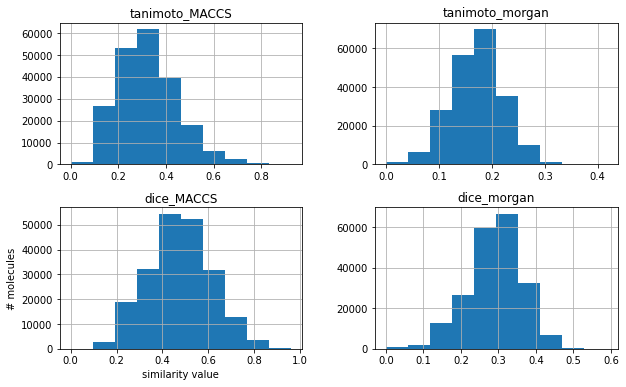

In [24]:
# Plot distribution of Tanimoto similarity of MACCS fingerprints
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,6), nrows=2, ncols=2)
similarity_df.hist(["tanimoto_MACCS"], ax=axes[0,0])
similarity_df.hist(["tanimoto_morgan"], ax=axes[0,1])
similarity_df.hist(["dice_MACCS"], ax=axes[1,0])
similarity_df.hist(["dice_morgan"], ax=axes[1,1])
axes[1,0].set_xlabel("similarity value")
axes[1,0].set_ylabel("# molecules")
plt.show()

We can compare similarities here too. This time let's directly compare Tanimoto and Dice similarities for the two fingerprints

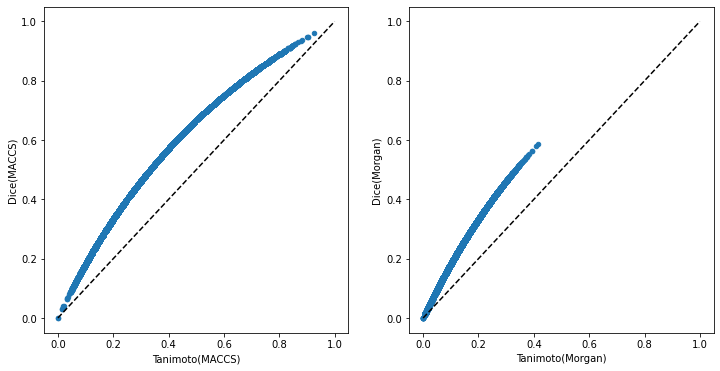

In [25]:

fig, axes = plt.subplots(figsize=(12,6), nrows=1, ncols=2)

similarity_df.plot('tanimoto_MACCS','dice_MACCS',kind='scatter',ax=axes[0])
axes[0].plot([0,1],[0,1],'k--')
axes[0].set_xlabel("Tanimoto(MACCS)")
axes[0].set_ylabel("Dice(MACCS)")

similarity_df.plot('tanimoto_morgan','dice_morgan',kind='scatter',ax=axes[1])
axes[1].plot([0,1],[0,1],'k--')
axes[1].set_xlabel("Tanimoto(Morgan)")
axes[1].set_ylabel("Dice(Morgan)")

plt.show()


Similarity distributions are important to interpret similarity values, e.g. a value of 0.6 needs to be evaluated differently for MACCS or Morgan fingerprints, as well as Tanimoto or Dice similarities.

In the following, we draw the most similar molecules for the Tanimoto similarity based on Morgan fingerprints.

#### Visualize most similar molecules

We visually inspect the structure of Gefitinib in comparison to the most similar molecules in our ranking, including the information about their bioactivity (pIC50 derived from ChEMBL in **talktorial 1**).

In [28]:
# Sort DataFrame by tanimoto_morgan
similarity_df.sort_values(['tanimoto_morgan'], ascending=False, inplace=True)
similarity_df.head()

,ChEMBL_ID,tanimoto_MACCS,tanimoto_morgan,dice_MACCS,dice_morgan,smiles
165003,AO-476/43415758,0.708333,0.416667,0.829268,0.588235,O=C(CSc1nnc2ccc(-c3ccccc3)nn12)c1ccc(Cl)cc1
163343,AO-476/40910135,0.826087,0.408696,0.904762,0.580247,Cn1c(Sc2cc(-c3ccccc3)nc3ncnn23)nnc1-c1ccc(Cl)cc1
55948,AH-357/03492016,0.763158,0.393258,0.865672,0.564516,Cc1nnc2ccc(-c3ccccc3)nn12
160926,AO-365/43473063,0.820513,0.392523,0.901408,0.563758,c1cncc(-c2nn3c(-c4ccc5ccccc5n4)nnc3s2)c1
165002,AO-476/43415755,0.514706,0.381356,0.679612,0.552147,NS(=O)(=O)c1ccc(NC(=O)CSc2nnc3ccc(-c4ccccc4)nn...


In [197]:
# Add a structural representation of the SMILES strings (ROMol - RDKit object Mol) to the DataFrame
#PandasTools.AddMoleculeColumnToFrame(similarity_df, 'smiles')

In [29]:
similarity_df.to_csv("/Users/viqor/Desktop/CADD/teachopencadd-1.3.0/talktorials/data/Specs_Similarity_CHEMBL1236107.csv")
#similarity_df.drop("ROMol", axis=1).to_csv("/Users/viqor/Desktop/CADD/teachopencadd-1.3.0/talktorials/data/Specs_Similarity_CHEMBL3582305.csv")

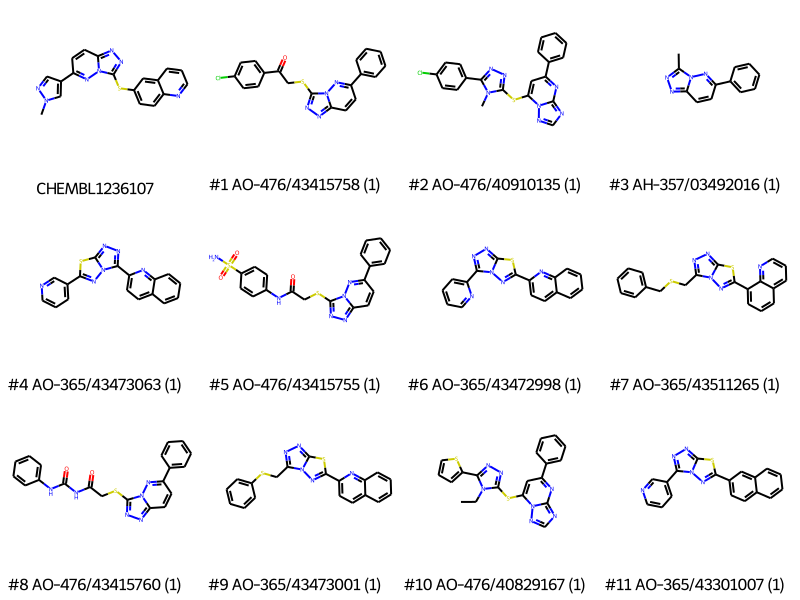

In [30]:
# Draw query and top molecules (+ bioactivity data)
sim_mols = [Chem.MolFromSmiles(i) for i in similarity_df.smiles][:11]

legend = ['#' + str(a) + ' ' + b + ' ('+str(round(1,2))+')' for a, b in zip(range(1,len(sim_mols)+1),
                                                                               similarity_df.ChEMBL_ID,)]
Chem.Draw.MolsToGridImage(mols = [query] + sim_mols[:11], 
                          legends = (['CHEMBL1236107'] + legend), 
                          molsPerRow = 4)

The top ranked molecules for Gefitinib are first Gefitinib entries (rank 1 and 2) in our dataset, followed by alterations of Gefitinib, e.g. different benzole substitution patterns. 
Note: ChEMBL contains the complete structure-activity relationship analysis for Gefitinib (being a well-studied compound), therefore it is not surprising to have that many Gefitinib-like compounds in our dataset.

We now check how well the similarity search is able to distinguish between active and inactive compounds based on our dataset. Therefore, we use the bioactivity values, which we collected from ChEMBL for each compound (bioactivity against EGFR) in **talktorial 1**.

#### Generate enrichment plots

In order to validate our virtual screening and see the ratio of active compounds detected, we generate an enrichment plot. 

Enrichment plots show 
* the ratio of top-ranked molecules (x-axis) from the whole dataset vs. 
* the ratio of active molecules (y-axis) from the whole dataset. 

We compare the Tanimoto similarity for MACCS and Morgan fingerprints. 

In order to decide whether we treat a molecule as active or inactive, we apply the commonly used pIC50 cut-off value of 6.3. Although there are several suggestions ranging from an pIC50 cut-off values of 5 to 7 in the literature or even to define an exclusion range when not to take data points, we think this cutoff is reasonable. 
The same cut-off will be used for machine learning in **talktorial 10**.

In [18]:
# pIC50 cut-off value used to discriminate active and inactive compounds
threshold = 6.3

,ChEMBL_ID,bioactivity,tanimoto_MACCS,tanimoto_morgan,dice_MACCS,dice_morgan,smiles,ROMol
523,CHEMBL483254,7.958607,1.000000,1.000000,1.000000,1.000000,Cc1[nH]c2ccccc2c1CCNCc1ccc(/C=C/C(=O)NO)cc1,
588,CHEMBL4080164,7.841638,0.945455,0.797619,0.971963,0.887417,Cc1[nH]c2ccccc2c1CCNCc1cccc(/C=C/C(=O)NO)c1.Cl,
1961,CHEMBL3526942,5.309804,0.733333,0.674157,0.846154,0.805369,Cc1[nH]c2cc(O)ccc2c1CCNCc1ccc(/C=C/C(N)=O)cc1,
1071,CHEMBL4079799,7.015923,0.682540,0.572917,0.811321,0.728477,Cc1c(CN(C)C)c2ccccc2n1Cc1ccc(/C=C/C(=O)NO)cc1,
888,CHEMBL4079007,7.305395,0.722222,0.557895,0.838710,0.716216,O=C(/C=C/c1ccc(CNCc2ccc3ccccc3n2)cc1)NO,

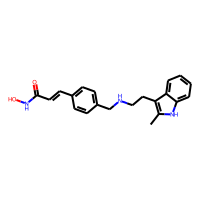
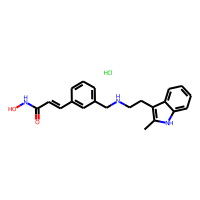
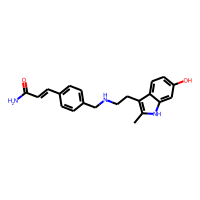
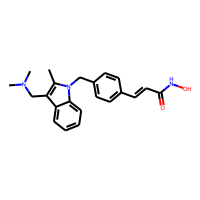
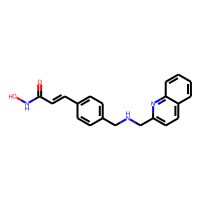

In [19]:
similarity_df.head()

In [5]:
def get_enrichment_data(similarity_df, similarity_measure, threshold):
    """
    This function calculates x and y values for enrichment plot:
    x - % ranked dataset
    y - % true actives identified
    """
    
    # Get number of molecules in data set
    mols_all = len(similarity_df)
    
    # Get number of active compounds in data set
    actives_all = sum(similarity_df.bioactivity >= threshold)

    # Initialize a list that will hold the counter for actives and compounds while iterating through our dataset
    actives_counter_list = []
    
    # Initialize counter for actives
    actives_counter = 0
    
    # Note: Data must be ranked for enrichment plots:
    # Sort compounds by selected similarity measure
    similarity_df.sort_values([similarity_measure], ascending=False, inplace=True)

    # Iterate over the ranked dataset and check each compound if active (by checking bioactivity)
    for value in similarity_df.bioactivity:
        if value >= threshold:
            actives_counter += 1
        actives_counter_list.append(actives_counter)

    # Transform number of molecules into % ranked dataset
    mols_perc_list = [i/mols_all for i in list(range(1, mols_all+1))]

    # Transform number of actives into % true actives identified
    actives_perc_list = [i/actives_all for i in actives_counter_list]

    # Generate DataFrame with x and y values as well as label 
    enrich_df = pd.DataFrame({'% ranked dataset':mols_perc_list, 
                              '% true actives identified':actives_perc_list,
                              'similarity_measure': similarity_measure})
    
    return enrich_df

In [21]:
# Define similarity measures to be plotted
sim_measures = ['tanimoto_MACCS', 'tanimoto_morgan']

# Generate a list of DataFrames containing all enrichment plot data for all similarity measures
enrich_data = [get_enrichment_data(similarity_df, i, threshold) for i in sim_measures]

In [22]:
# Prepare data set for plotting:
# Concatenate per-similarity measure DataFrames to one DataFrame
# - different similarity measures are still distinguishable by the "similarity_measure" column
enrich_df = pd.concat(enrich_data)

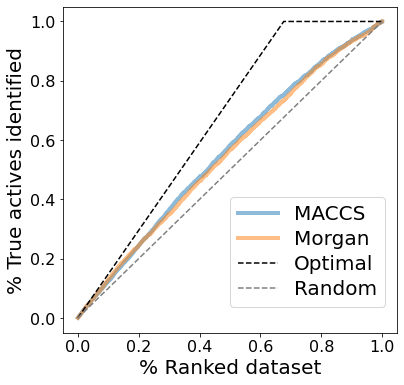

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

fontsize = 20

for key, grp in enrich_df.groupby(['similarity_measure']):
    ax = grp.plot(ax = ax,
                  x = '% ranked dataset',
                  y = '% true actives identified',
                  label=key,
                  alpha=0.5, linewidth=4)
ax.set_ylabel('% True actives identified', size=fontsize)
ax.set_xlabel('% Ranked dataset', size=fontsize)

# Ratio of actives in dataset
ratio = sum(similarity_df.bioactivity >= threshold) / len(similarity_df)

# Plot optimal curve
ax.plot([0,ratio,1], [0,1,1], label="Optimal curve", color="black", linestyle="--")

# Plot random curve
ax.plot([0,1], [0,1], label="Random curve", color="grey", linestyle="--")

plt.tick_params(labelsize=16)
plt.legend(labels=['MACCS', 'Morgan', "Optimal", "Random"], loc=(.5, 0.08), 
           fontsize=fontsize, labelspacing=0.3)

# Save plot - use bbox_inches to include text boxes:
# https://stackoverflow.com/questions/44642082/text-or-legend-cut-from-matplotlib-figure-on-savefig?rq=1
plt.savefig("../data/T4/enrichment_plot.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

Enrichment plots show a slightly better performance for fingerprint comparison based on Morgan fingerprints than based on MACCS fingerprints.

In [6]:
# Get EF for x% of ranked dataset
def print_data_ef(perc_ranked_dataset, enrich_df):
    data_ef = enrich_df[enrich_df['% ranked dataset'] <= perc_ranked_dataset/100].tail(1)
    data_ef = round(100*float(data_ef['% true actives identified']), 1)
    print("Experimental EF for ", perc_ranked_dataset, "% of ranked dataset: ", data_ef, "%", sep="")

# Get random EF for x% of ranked dataset
def print_random_ef(perc_ranked_dataset):
    random_ef = round(float(perc_ranked_dataset), 1)
    print("Random EF for ", perc_ranked_dataset, "% of ranked dataset:       ", random_ef, "%", sep="")

# Get optimal EF for x% of ranked dataset
def print_optimal_ef(perc_ranked_dataset, similarity_df, threshold):
    ratio = sum(similarity_df.bioactivity >= threshold) / len(similarity_df) * 100
    if perc_ranked_dataset <= ratio:
        optimal_ef = round(100/ratio * perc_ranked_dataset, 1)
    else:
        optimal_ef = round(float(100), 2)
    print("Optimal EF for ", perc_ranked_dataset, "% of ranked dataset:      ", optimal_ef, "%", sep="")

In [25]:
# Choose percentage
perc_ranked_list = 5

# Get EF data
for i, sim in enumerate(sim_measures):
    print("Similarity measure:", sim)
    print_data_ef(perc_ranked_list, enrich_data[i])
    print()
print_random_ef(perc_ranked_list)
print_optimal_ef(perc_ranked_list, similarity_df, threshold)

Similarity measure: tanimoto_MACCS
Experimental EF for 5% of ranked dataset: 6.5%

Similarity measure: tanimoto_morgan
Experimental EF for 5% of ranked dataset: 6.5%

Random EF for 5% of ranked dataset:       5.0%
Optimal EF for 5% of ranked dataset:      7.4%


## Discussion

We have performed our virtual screening using the Tanimoto similarity. Of course, this could also be done using Dice or any other similarity measure. 

A drawback of a similarity search with molecular fingerprints is that it is based on molecular similarity and thus does not yield any novel structures. Another challenge when working with molecular similarity are so-called activity cliffs. A small change in a functional group of a molecule may initiate a jump in bioactivity. 

## Quiz

* What could be a starting point to circumvent activity cliffs?
* What are the advantages and disadvantages of MACCS and Morgan fingerprints compared to each other fingerprints?
* How can you explain the different orders in the similarity dataframe depending on the fingerprint used?